这是一个词向量模型代码展示
*导入数据
*构建模型
*训练模型
*可视化
*保存模型
*加载模型
*计算相似度

# 数据准备

In [1]:
## 导入数据
import pandas as  pd

In [2]:
df = pd.read_excel(r'D:\text analysis\text_analysis_ad_sample.xlsx', index_col=0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


# 分词

In [3]:
import jieba #中文分词

In [4]:
## 定义文本清洗函数
def clean_text(text):
    words = jieba.lcut(text)
    return ' '.join(words) #将分词结果用空格连接成字符串

In [5]:
test = df['广告文本'][0] #从DataFrame的"广告文本"列中提取第一个广告文本作为测试样本
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\SHANGS~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.931 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [6]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


# 语料库准备

In [7]:
from gensim.test.utils import common_texts 
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [8]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() #切分词语 corpus是一个二维列表
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

# 自己训练词嵌入模型

In [9]:
from gensim.models import Word2Vec #训练 Word2Vec 模型

# 训练词嵌入模型
model = Word2Vec(
    corpus, #训练语料
    window = 5, #训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100, #自定义训练向量维度
    min_count = 1, #忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('Word2vec_ad.model')

# 查看词向量

In [10]:
word_list = model.wv.index_to_key #获取词汇表
word_vectors = model.wv[word_list] #获取词向量

# 打印前5个词及其向量表示
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}:{vector}')

之:[-0.71622866  0.94553006  0.41706413 -0.15981516 -0.28561056 -2.3145022
  0.72768205  2.8546107  -1.1968955  -1.2183124  -0.6314749  -2.1303031
 -0.30153427  1.296822    0.5786876  -0.46933404  0.5222025  -0.52624255
 -0.28718674 -2.2202294   1.1114234  -0.04218505  0.6270409  -0.8869502
 -0.03829926  0.35907748 -0.39646217 -0.731352   -1.1066355  -0.14788035
  1.1056693   0.5858658   0.45197034 -0.7482825  -0.7052681   1.7326766
  0.5597484  -0.9223417  -1.1066488  -2.2001061   0.08490185 -0.7352807
 -0.09340607 -0.91209614  1.1952176  -0.6602179  -1.5174669   0.44408122
  1.2641724   0.8124059   0.40383023 -0.5500312  -0.7141226  -0.12112767
 -0.527826    1.0372448   0.22992653  0.18007402 -0.5646815   0.4727125
  0.2735493   0.41729537 -0.63944346  0.70555985 -0.7400658   1.3932269
  0.06818733  0.8951842  -1.3823625   1.8495718  -0.783998    1.1613123
  0.73941827 -0.0783822   1.80092     0.33145306  0.11580631 -0.31088957
 -0.4379527   0.4622988  -0.72412145  0.30824193 -1.12395

# 计算词语相似度

In [11]:
## 使用余弦相似度 wv 度量词对之间的语义接近度
## 余弦相似度的取值介于[-1，1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
print(model.wv.similarity('医生','疼痛'))
print(model.wv.similarity('医生','神经'))
print(model.wv.similarity('医生','伤风'))
print(model.wv.similarity('疼痛','神经'))
print(model.wv.similarity('伤风','疼痛'))
print(model.wv.similarity('神经','伤风'))

0.6988996
0.6684511
0.63111925
0.995462
0.9914949
0.995648


In [12]:
model.wv.most_similar('卫生') #返回与“卫生”最相似的词列表（包括相似度分数）

[('皮肤', 0.9985314607620239),
 ('之美', 0.998124361038208),
 ('又', 0.9976474642753601),
 ('能', 0.9976370930671692),
 ('肾亏', 0.997579038143158),
 ('发热', 0.9974163770675659),
 ('腹痛', 0.9964841604232788),
 ('蓝色', 0.9964763522148132),
 ('一切', 0.9963300824165344),
 ('点', 0.9963211417198181)]

# 可视化

In [13]:
import matplotlib.pyplot as plt #用于绘制二维图形
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

words = ['医生','疼痛','神经','伤风']
vectors = [model.wv[word] for word in words]

In [14]:
## 使用PCA进行降维
from sklearn.decomposition import PCA #语义空间降维，用于展示词语在二维空间的相对位置
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

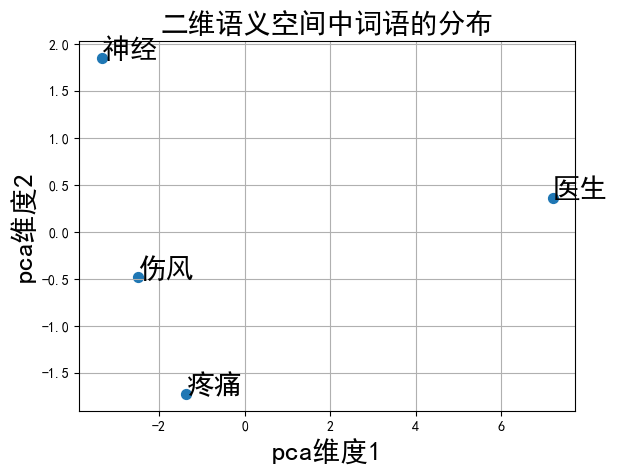

In [15]:
## 绘制四个词语在二维空间的相对位置
plt.figure()

## 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:,0],pca_result[:,1],s = 50)

for i, word in enumerate(words):
    plt.annotate(word,(pca_result[i,0],pca_result[i,1]),fontsize = 20)
    
plt.xlabel('pca维度1',fontsize = 20)
plt.ylabel('pca维度2',fontsize = 20)
plt.title('二维语义空间中词语的分布',fontsize = 20)
plt.grid(True)
plt.show()

# 损失计算

In [16]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# 初始化模型（注意：不要设置 epochs，这里我们手动控制）
model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,
    compute_loss=True
)

# 构建词汇表
model.build_vocab(corpus)

# 手动逐轮训练并记录损失
losses = []
previous_loss = 0
epochs = 10

for epoch in range(epochs):
    model.train(
        corpus,
        total_examples=model.corpus_count,
        epochs=1,
        compute_loss=True
    )
    current_loss = model.get_latest_training_loss()
    epoch_loss = current_loss - previous_loss
    losses.append(epoch_loss)
    previous_loss = current_loss

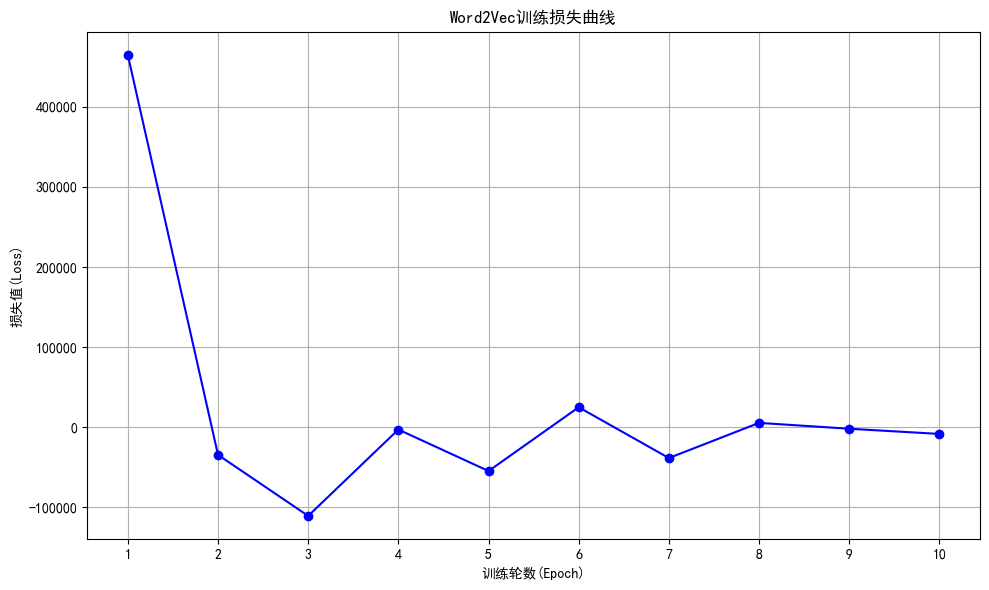


最终模型信息：
词汇表大小：9942


In [17]:
## 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, 'o-', color='blue')
plt.title('Word2Vec训练损失曲线')
plt.xlabel('训练轮数(Epoch)')
plt.ylabel('损失值(Loss)')
plt.grid(True)
plt.xticks(range(1, epochs + 1))
plt.tight_layout()
plt.show()

## 打印最终模型的一些信息
print("\n最终模型信息：")
print(f"词汇表大小：{len(model.wv.key_to_index)}")